In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #data visualization

In [2]:
dataset = pd.read_csv('/Users/edselfabre/Downloads/Project 1 - Finance - Predictive Analytics/Dataset/loan.csv')
pd.set_option('display.max_columns', 500)
dataset.shape

(5000, 17)

In [3]:
#percentage of missing values
pd.set_option('display.max_rows', None)
round(dataset.isnull().sum()/len(dataset.index), 2)*100

customer_id          0.0
loan_id              0.0
loan_type            0.0
loan_amount          0.0
interest_rate        0.0
loan_term            0.0
employment_type      0.0
income_level         0.0
credit_score         0.0
gender               0.0
marital_status       0.0
education_level      0.0
application_date     0.0
approval_date        0.0
disbursement_date    0.0
due_date             0.0
default_status       0.0
dtype: float64

In [4]:
#removing columns having missing values since theres no missing value, 
#we have to make it sure to do it in the right way.
missing_columns = dataset.columns[100*(dataset.isnull().sum()/len(dataset.index)) > 0]
print(missing_columns)

Index([], dtype='object')


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5000 non-null   object 
 1   loan_id            5000 non-null   object 
 2   loan_type          5000 non-null   object 
 3   loan_amount        5000 non-null   int64  
 4   interest_rate      5000 non-null   float64
 5   loan_term          5000 non-null   int64  
 6   employment_type    5000 non-null   object 
 7   income_level       5000 non-null   object 
 8   credit_score       5000 non-null   int64  
 9   gender             5000 non-null   object 
 10  marital_status     5000 non-null   object 
 11  education_level    5000 non-null   object 
 12  application_date   5000 non-null   object 
 13  approval_date      5000 non-null   object 
 14  disbursement_date  5000 non-null   object 
 15  due_date           5000 non-null   object 
 16  default_status     5000 

In [6]:
cols_del=['customer_id', 'loan_id', 'application_date', 'approval_date', 'disbursement_date', 'due_date']
dataset.drop(cols_del, axis=1, inplace=True)
dataset.shape

(5000, 11)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_type        5000 non-null   object 
 1   loan_amount      5000 non-null   int64  
 2   interest_rate    5000 non-null   float64
 3   loan_term        5000 non-null   int64  
 4   employment_type  5000 non-null   object 
 5   income_level     5000 non-null   object 
 6   credit_score     5000 non-null   int64  
 7   gender           5000 non-null   object 
 8   marital_status   5000 non-null   object 
 9   education_level  5000 non-null   object 
 10  default_status   5000 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 395.6+ KB


In [8]:
# create categorical variable
dataset['default_status'].value_counts()

default_status
False    4001
True      999
Name: count, dtype: int64

default_status
False    4001
True      999
Name: count, dtype: int64

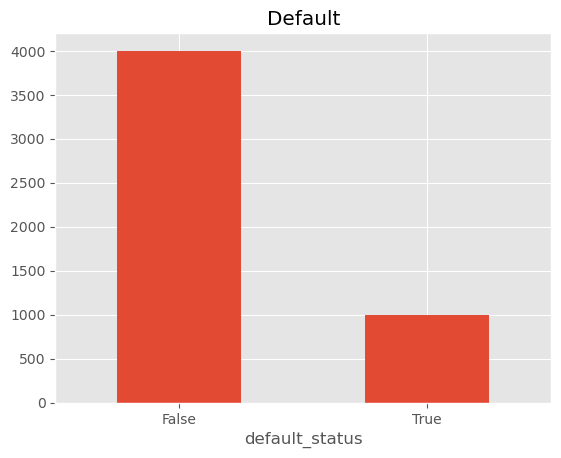

In [9]:
plt.style.use('ggplot')
dataset['default_status'].value_counts().plot.bar(title='Default',rot=0)
display(dataset['default_status'].value_counts())

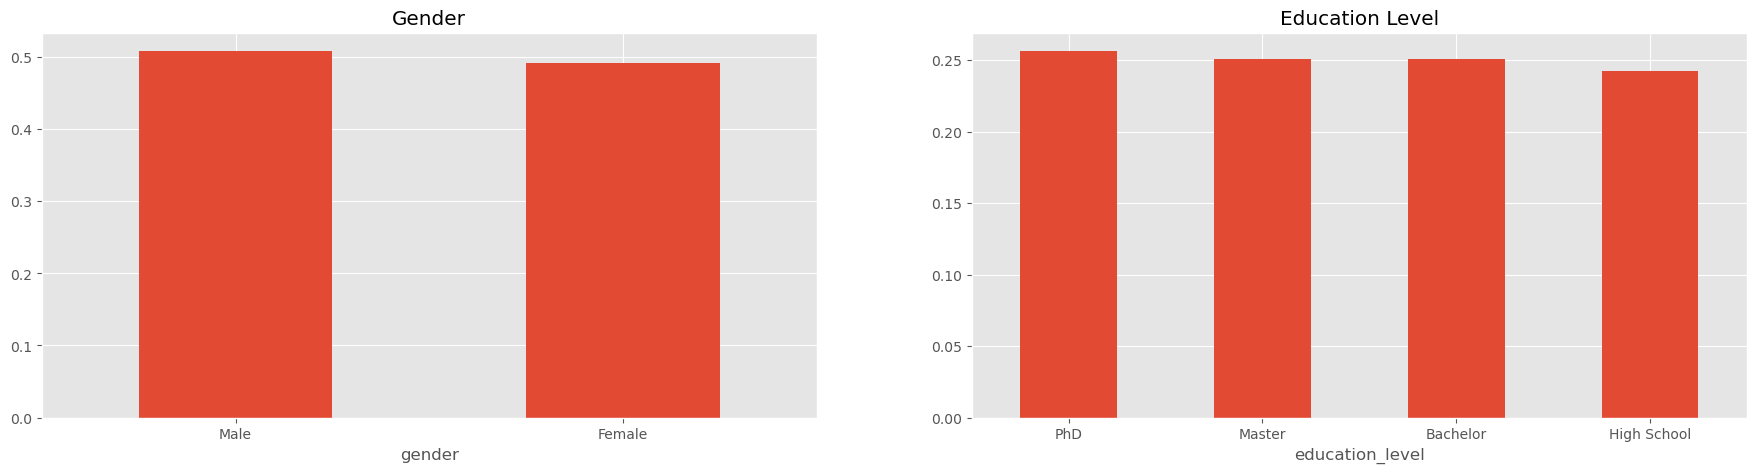

In [10]:
# Create a figure and axes for subplots
fig2, ax2 = plt.subplots(1, 2)

# Plot gender distribution
dataset['gender'].value_counts(normalize=True).plot(figsize=(22,5), ax=ax2[0], kind='bar', title='Gender', rot=0)

# Plot education level distribution
dataset['education_level'].value_counts(normalize=True).plot(ax=ax2[1], kind='bar', title='Education Level', rot=0)

plt.show()

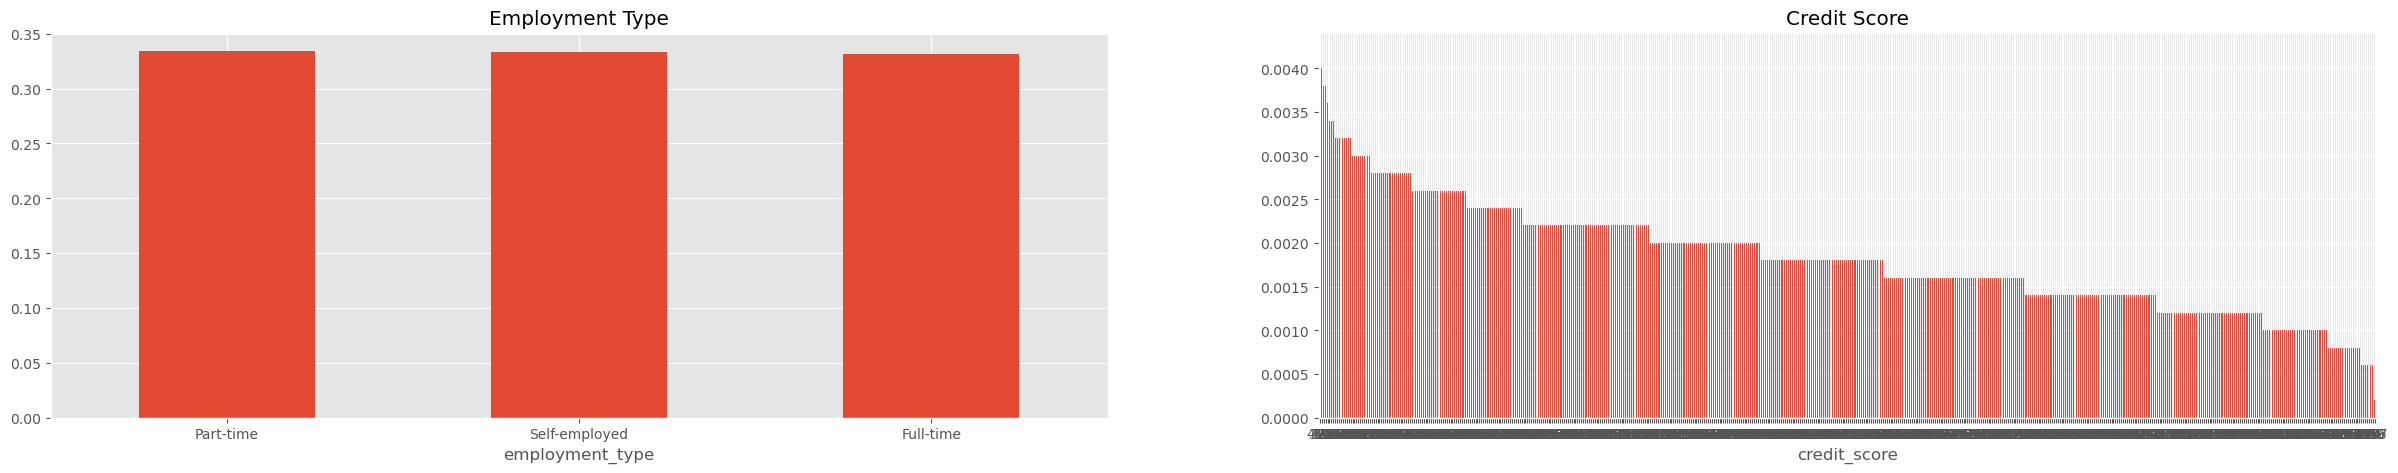

In [11]:
# Create a figure and axes for subplots
fig2, ax2 = plt.subplots(1, 2)

# Plot employment type distribution
dataset['employment_type'].value_counts(normalize=True).plot(figsize=(30,5), ax=ax2[0], kind='bar', title='Employment Type', rot=0)

# Plot Credit Score distribution
dataset['credit_score'].value_counts(normalize=True).plot(ax=ax2[1], kind='bar', title='Credit Score', rot=0)

plt.show()

<Axes: xlabel='count', ylabel='gender'>

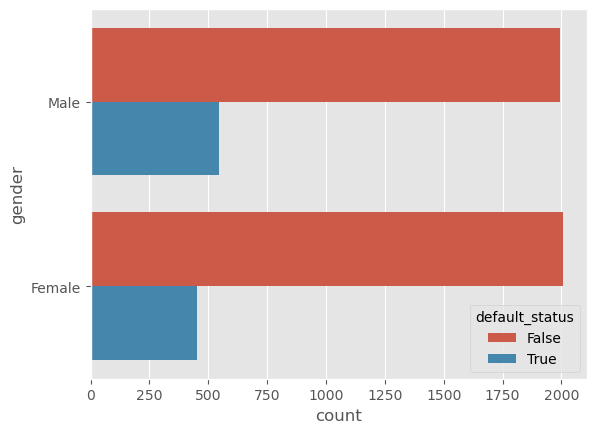

In [12]:
#Gender
#Default
sns.countplot(y='gender',hue = 'default_status' , data= dataset)

<Axes: xlabel='count', ylabel='education_level'>

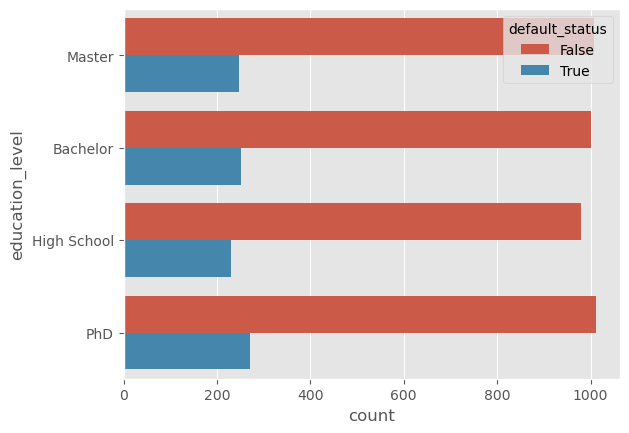

In [13]:
#Educational
#Default
sns.countplot(y='education_level',hue = 'default_status' , data= dataset)

<Axes: xlabel='count', ylabel='credit_score'>

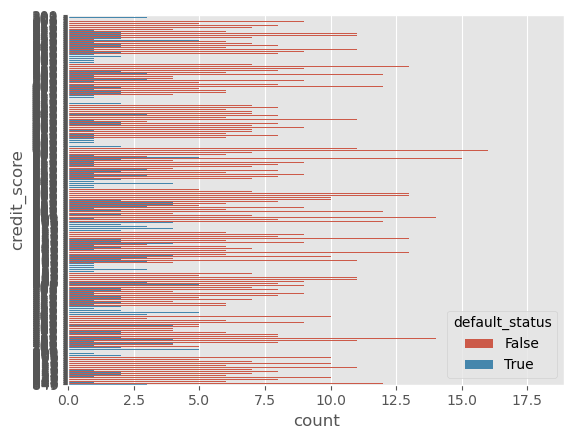

In [14]:
#Credit Score
#Default
sns.countplot(y='credit_score',hue = 'default_status' , data= dataset)

<Axes: xlabel='count', ylabel='employment_type'>

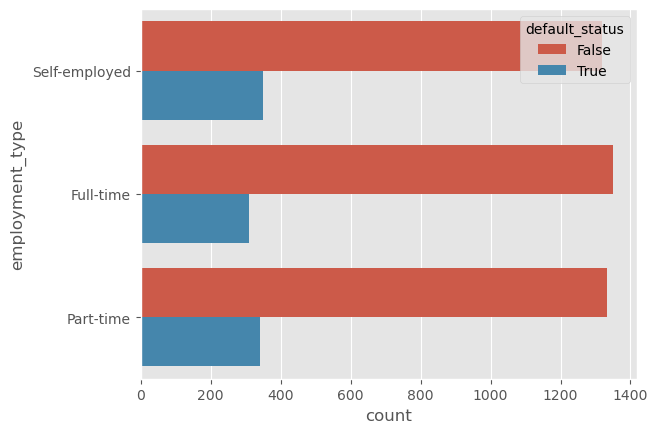

In [15]:
#Employment
#Default
sns.countplot(y='employment_type',hue = 'default_status' , data= dataset)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_type        5000 non-null   object 
 1   loan_amount      5000 non-null   int64  
 2   interest_rate    5000 non-null   float64
 3   loan_term        5000 non-null   int64  
 4   employment_type  5000 non-null   object 
 5   income_level     5000 non-null   object 
 6   credit_score     5000 non-null   int64  
 7   gender           5000 non-null   object 
 8   marital_status   5000 non-null   object 
 9   education_level  5000 non-null   object 
 10  default_status   5000 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 395.6+ KB


In [17]:
#Convert non numeric variables to numeric
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
cat=['default_status','loan_type','employment_type','income_level','gender','marital_status','education_level']
for var in cat:
    le = preprocessing.LabelEncoder()
    dataset[var]=le.fit_transform(dataset[var].astype('str'))

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_type        5000 non-null   int64  
 1   loan_amount      5000 non-null   int64  
 2   interest_rate    5000 non-null   float64
 3   loan_term        5000 non-null   int64  
 4   employment_type  5000 non-null   int64  
 5   income_level     5000 non-null   int64  
 6   credit_score     5000 non-null   int64  
 7   gender           5000 non-null   int64  
 8   marital_status   5000 non-null   int64  
 9   education_level  5000 non-null   int64  
 10  default_status   5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = dataset.iloc[:,np.r_[0,4,5,7,8,9]].values
y = dataset.iloc[:,10].values

In [21]:
X

array([[0, 2, 2, 1, 2, 2],
       [3, 0, 2, 0, 1, 0],
       [3, 0, 1, 1, 0, 1],
       ...,
       [2, 0, 0, 0, 2, 1],
       [0, 2, 2, 1, 1, 3],
       [3, 2, 1, 1, 2, 2]])

In [22]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [29]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [30]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [31]:
# Train the model with the best hyperparameters
best_rf_clf = grid_search.best_estimator_
best_rf_clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [32]:
# Make predictions on the test set
y_pred = best_rf_clf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are defined and contain the true labels and predicted labels, respectively

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [36]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined and contain the true labels and predicted labels, respectively

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1215
           1       1.00      0.00      0.00       285

    accuracy                           0.81      1500
   macro avg       0.91      0.50      0.45      1500
weighted avg       0.85      0.81      0.72      1500



In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for grid search
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object for Decision Tree
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=param_grid_dt,
                              cv=5,  # Number of cross-validation folds
                              scoring='accuracy'  # Metric to optimize
                             )

# Perform grid search on the training data
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters for Decision Tree
best_params_dt = grid_search_dt.best_params_

# Train the Decision Tree model with the best hyperparameters
best_dt = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

In [41]:
from sklearn.metrics import accuracy_score, classification_report

# Obtain predictions from the trained Decision Tree model on the test set
y_pred_dt = best_dt.predict(X_test)

# Compute accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Compute classification report for Decision Tree
classification_report_dt = classification_report(y_test, y_pred_dt, zero_division=1)

# Print the results
print("Best Hyperparameters for Decision Tree:", best_params_dt)
print("Accuracy for Decision Tree:", accuracy_dt)
print("Classification Report for Decision Tree:\n", classification_report_dt)


Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy for Decision Tree: 0.788
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      1215
           1       0.26      0.06      0.10       285

    accuracy                           0.79      1500
   macro avg       0.54      0.51      0.49      1500
weighted avg       0.71      0.79      0.73      1500



In [43]:
from sklearn.metrics import confusion_matrix

# Obtain predictions from the trained Decision Tree model on the test set
y_pred_dt = best_dt.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1164   51]
 [ 267   18]]
